In [67]:
import os
import sys
import pandas as pd
import numpy
import pylab as pl 
import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline
import json

Populating the interactive namespace from numpy and matplotlib


In [68]:
#the gender gap youtube video
from IPython.display import YouTubeVideo
YouTubeVideo('G_ikzQM93W8')

In [69]:
#read census data and split by male and female
url='http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'

allmales = {}
allfemales = {}
#Males
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)
#Female
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

#Exploratory Phase

In [70]:
#scatter matrix
from pandas.tools.plotting import scatter_matrix
print allmales['all'].columns
#scatter_matrix (allmales['all'], figsize = (16, 16), diagonal = 'kde')

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [71]:
#Create a function to clean the Data- Add column names and convert to numeric
def cleanData(data):
    #rename columns
    data = data.rename(columns={u'Unnamed: 44': 'Median Inc SD', u'Unnamed: 46': 'Mean Inc SD', u'Unnamed: 48':'Gini SD'})

    # convert all data to numeric and return
    return data.convert_objects(convert_numeric=True)

In [72]:
#Clean the male and female data
for race in allmales:
    allmales[race] = cleanData(allmales[race])
for race in allfemales:
    allfemales[race] = cleanData(allfemales[race])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ea95a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120e48250>]], dtype=object)

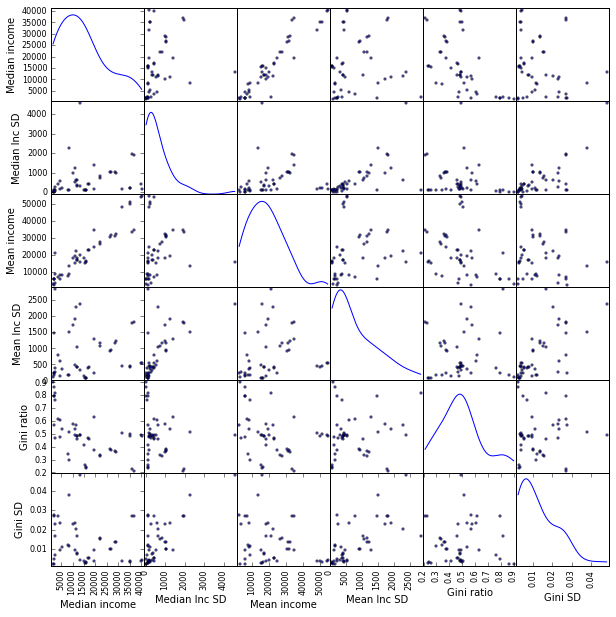

In [73]:
#scatter matrix male
scatter_matrix(allmales['all'].ix[:,-6:].copy() , figsize=(10, 10), alpha=0.6, diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1215fe1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123e4d450>]], dtype=object)

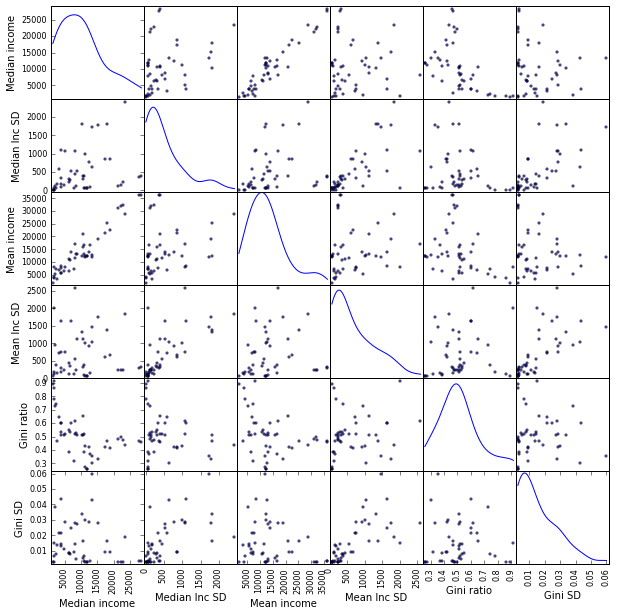

In [74]:
#scatter matrix female
scatter_matrix(allfemales['all'].ix[:,-6:].copy() , figsize=(10, 10), alpha=0.6, diagonal='kde')

In [75]:
#Create an array of male income and female income 
maleincome = []
maleincome = [allmales['all']['Median income'][1], allmales['white']['Median income'][1], 
                allmales['black']['Median income'][1], allmales['hispanic']['Median income'][1], 
                allmales['asian']['Median income'][1]]
print maleincome
femaleincome = []
femaleincome = [allfemales['all']['Median income'][1], allfemales['white']['Median income'][1], 
                allfemales['black']['Median income'][1], allfemales['hispanic']['Median income'][1], 
                allfemales['asian']['Median income'][1]]
print femaleincome

[35228.0, 40122.0, 24855.0, 25411.0, 40153.0]
[22063.0, 23780.0, 20044.0, 17762.0, 24840.0]


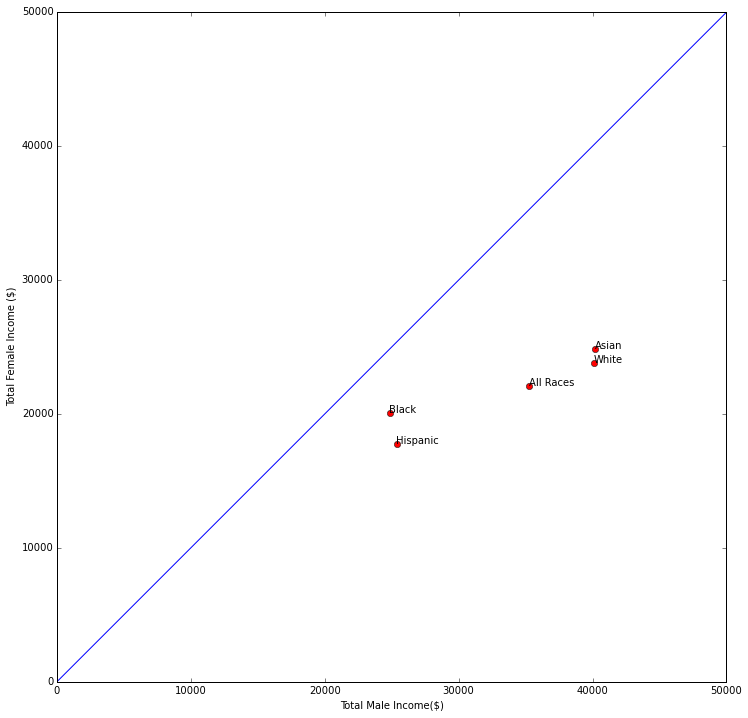

In [96]:
#plot income by gender
labels = ['All Races', 'White', 'Black', 'Hispanic', 'Asian']
pl.figure(figsize(12,12))
pl.xlabel('Total Male Income($)')
pl.ylabel('Total Female Income ($)')
pl.plot(maleincome, femaleincome, 'ro')
pl.plot([1,50000], [1,50000]) #line of equality
for label, x, y in zip(labels, maleincome, femaleincome):
    pl.annotate(label, xy = (x, y))

Based on this plot, the median total income for each race individually and for all races combined, for women is much less than that for men, because the points (red) fall below the 1-1 line (blue).

#Linear Regression of the Data

In [97]:
#Fit a line to the data
maleincome2 = sm.add_constant(maleincome, prepend = False)
mod = sm.OLS(femaleincome, maleincome2).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Tue, 13 Oct 2015   Prob (F-statistic):             0.0176
Time:                        17:19:45   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3531      0.074      4.764      0.0

Based on this linear regression, the linear model looks like Female Income = 0.35 * Male Income + 9,989.84

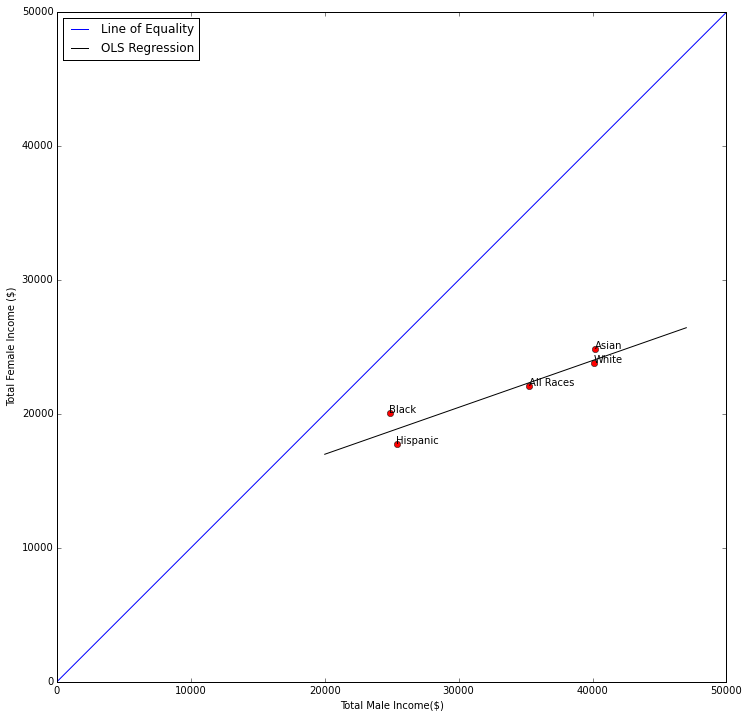

In [98]:
#plot income by gender with the OLS Line
XLR = np.arange(20000, 48000, 1000)
YLR = 0.35*XLR + 9989.84

labels = ['All Races', 'White', 'Black', 'Hispanic', 'Asian']
pl.figure(figsize(12,12))
pl.xlabel('Total Male Income($)')
pl.ylabel('Total Female Income ($)')
pl.plot(maleincome, femaleincome, 'ro')
pl.plot([1,50000], [1,50000]) #line of equality
pl.plot(XLR, YLR, 'k') #OLS Regression
#Label the points
for label, x, y in zip(labels, maleincome, femaleincome):
    pl.annotate(label, xy = (x, y))
#Label the lines in a legend
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue',  label='Line of Equality')
black_line = mlines.Line2D([], [], color='black',  label='OLS Regression')
pl.legend(handles=[blue_line, black_line], loc = 2)


#Analytical Best Regression Line

In [99]:
cor = scipy.stats.spearmanr(femaleincome, maleincome)
#print cor
beta1 = cor[0]*np.std(femaleincome)/np.std(maleincome)
print beta1
beta2 = np.mean(femaleincome)-(beta1*np.mean(maleincome))
print beta2

0.338176888526
10485.9510732


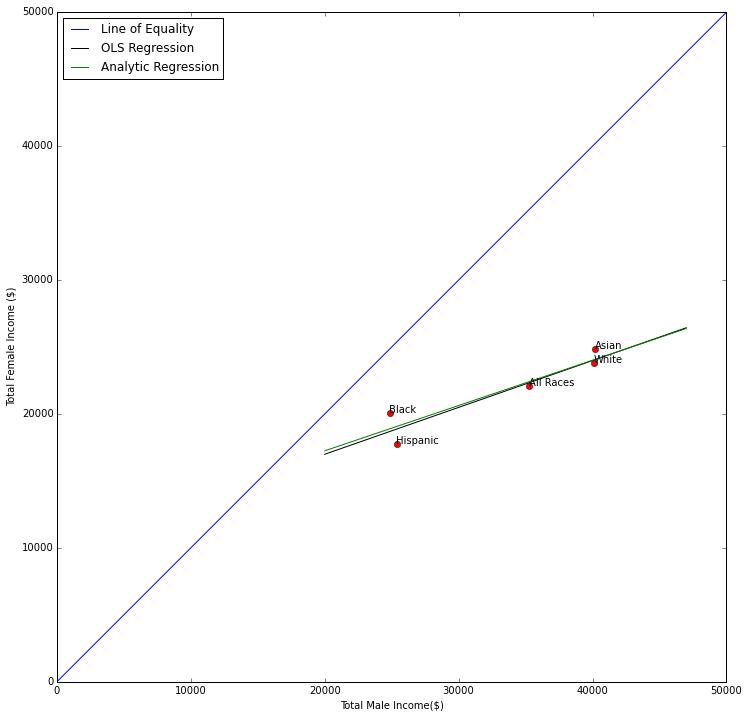

In [105]:
#plot income by gender with the OLS Line and Analytics Best Regression
XLR = np.arange(20000, 48000, 1000)
YLR = 0.35*XLR + 9989.84
XABR = np.arange(20000, 48000, 1000)
YABR = beta1*XABR + beta2


labels = ['All Races', 'White', 'Black', 'Hispanic', 'Asian']
pl.figure(figsize(12,12))
pl.xlabel('Total Male Income($)')
pl.ylabel('Total Female Income ($)')
pl.plot(maleincome, femaleincome, 'ro')
pl.plot([1,50000], [1,50000]) #line of equality
pl.plot(XLR, YLR, 'k') #OLS Regression
pl.plot(XABR, YABR, 'g') #Analytic Best Regression
#Label the points
for label, x, y in zip(labels, maleincome, femaleincome):
    pl.annotate(label, xy = (x, y))
#Label the lines in a legend
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue',  label='Line of Equality')
black_line = mlines.Line2D([], [], color='black',  label='OLS Regression')
green_line = mlines.Line2D([], [], color='green',  label='Analytic Regression')
pl.legend(handles=[blue_line, black_line, green_line], loc = 2)

The numeric and analytic lines are almost the same.  The more points in an area, the closer the lines appear to be. 

In [106]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,
                                      allmales['white']['Median income'][:].values,
                                      allmales['black']['Median income'][:].values,
                                      allmales['hispanic']['Median income'][:].values,
                                      allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,
                                        allfemales['white']['Median income'][:].values,
                                        allfemales['black']['Median income'][:].values,
                                        allfemales['hispanic']['Median income'][:].values,
                                        allfemales['asian']['Median income'][:].values]).flatten())

#I am gonna create the mask int he next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]
#print allmask
all_females.mask = allmask
all_males.mask = allmask

In [107]:
#fit a regression using OLS

all_male2 = sm.add_constant(all_males, prepend = False)
mod2 = sm.OLS(~np.isnan(all_females), ~np.isnan(all_male2)).fit()
print mod2.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     677.0
Date:                Tue, 13 Oct 2015   Prob (F-statistic):           3.36e-72
Time:                        17:39:53   Log-Likelihood:                 23.599
No. Observations:                 245   AIC:                            -43.20
Df Residuals:                     243   BIC:                            -36.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8436      0.032     26.019      0.0

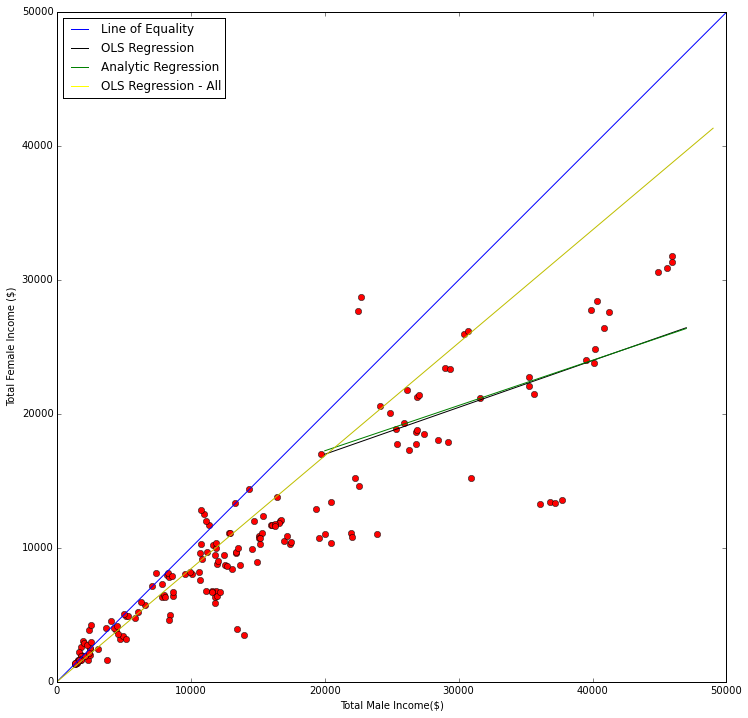

In [113]:
#plot income by gender with the OLS Line and Analytics Best Regression
XLR = np.arange(20000, 48000, 1000)
XLR2 = np.arange(0, 50000, 1000)
YLR = 0.35*XLR + 9989.84
YLR2 = 0.8436*XLR2 + .1290
XABR = np.arange(20000, 48000, 1000)
YABR = beta1*XABR + beta2


labels = ['All Races', 'White', 'Black', 'Hispanic', 'Asian']
pl.figure(figsize(12,12))
pl.xlabel('Total Male Income($)')
pl.ylabel('Total Female Income ($)')
pl.plot(all_males, all_females, 'ro')
pl.plot([1,50000], [1,50000]) #line of equality
pl.plot(XLR, YLR, 'k') #OLS Regression
pl.plot(XABR, YABR, 'g') #Analytic Best Regression
pl.plot(XLR2, YLR2, 'y') #OLS Regression ALL

#Label the lines in a legend
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue',  label='Line of Equality')
black_line = mlines.Line2D([], [], color='black',  label='OLS Regression')
green_line = mlines.Line2D([], [], color='green',  label='Analytic Regression')
yellow_line = mlines.Line2D([], [], color='yellow',  label='OLS Regression - All')
pl.legend(handles=[blue_line, black_line, green_line, yellow_line], loc = 2)

The total median incomes were not representative of all income inequalities. It appears as though for Black and Hispanic people, gender is not as impactful as for White and Asian people.

Picking Income - $100,000
Male Income = $100,000
Female Income =  0.8436(100000) + .1290 = $84,360.13